In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [67]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [68]:
df.head()  # first 5 data
#df.shape   # Total rows and column

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [69]:
df.info()  # info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [70]:
df.isnull().sum()  # No NULL Data

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [71]:
df.duplicated().sum()  # No duplicate data

0

In [72]:
df['Exited'].value_counts()  # how many exited from the bank.

0    7963
1    2037
Name: Exited, dtype: int64

In [73]:
df['Gender'].value_counts()  # Total Male and Female

Male      5457
Female    4543
Name: Gender, dtype: int64

In [74]:
df['Geography'].value_counts()  # places where bank operate

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [75]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [76]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
# converting CATEGORICAL data into NUMERICAL data
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [78]:
# scale the values.
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [54]:
X.shape

(10000, 11)

In [55]:
y.shape

(10000,)

In [56]:
X_train.shape

(8000, 11)

In [79]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [80]:
X_train_scaled.shape

(8000, 11)

In [81]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [86]:
# In keras you can develop two types of model
# 1. Sequential
# 2. Non Sequential

#model = Sequential()

# Add layers ( Input -> Hidden -> Output)

#model.add(Dense(3,activation='sigmoid',input_dim = 10))  #hidden layer
#model.add(Dense(1,activation='sigmoid')) #output layer

model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [87]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_9 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [89]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 5ms/step - loss: 0.6022 - accuracy: 0.7236 - val_loss: 0.5251 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5115 - accuracy: 0.7958 - val_loss: 0.5009 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.7958 - val_loss: 0.4991 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.7958 - val_loss: 0.4985 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5023 - accuracy: 0.7958 - val_loss: 0.4980 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.7958 - val_loss: 0.4976 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5017 - accuracy: 0.7958 - val_loss: 0.4973 - val_accuracy: 0.7969

In [90]:
y_pred = model.predict(X_test)

In [91]:
y_pred

array([[0.24009538],
       [0.23245186],
       [0.23245186],
       ...,
       [0.23245186],
       [0.2308076 ],
       [0.24009538]], dtype=float32)

In [92]:
y_pred = y_pred.argmax(axis=-1)

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

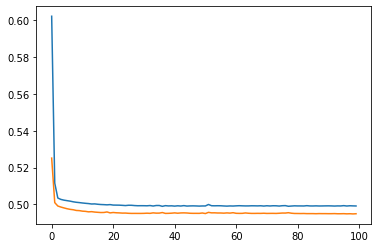

In [94]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

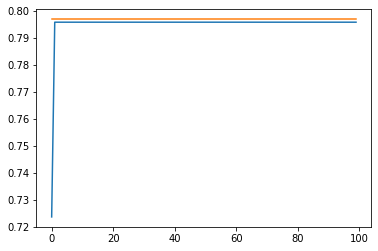

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])